Step 1: Data Exploration


Feature Names: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       11.430         15.39           73.06      399.8          0.09639   
1       11.280         13.39           73.00      384.8          0.11640   
2        9.738         11.97           61.24      288.5          0.09250   
3       11.430      

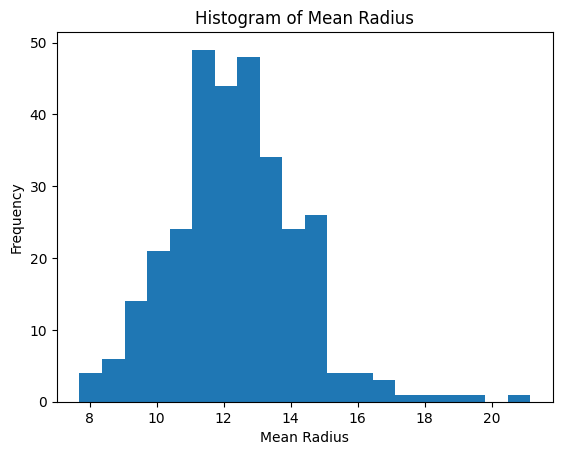

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("patients.csv")

# Display feature names
feature_names = df.columns
print("Feature Names:", feature_names)

# Display initial rows of the dataset
print(df.head())

# Calculate and print basic statistics
print(df.describe())

# Plot a histogram of a selected feature (I chose mean radius)
import matplotlib.pyplot as plt
plt.hist(df['mean radius'], bins=20)
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Radius')
plt.show()


Step 2: Data Preprocessing and Visualization

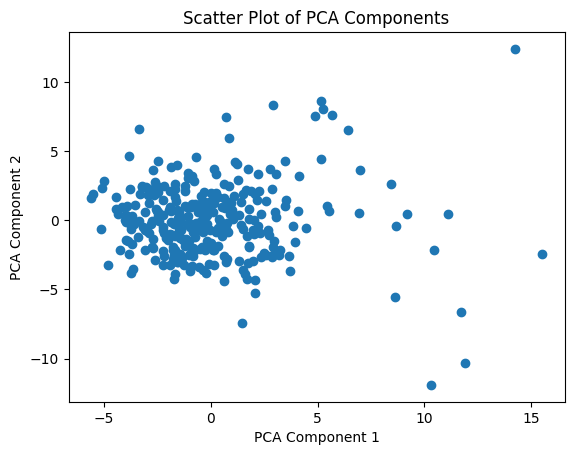

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Used PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a scatter plot
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components')
plt.show()


Step 3: Calculating Euclidean Distance

In [3]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

Step 4: Anomaly Score Calculation

In [4]:
def calculate_anomaly_score(data, query_point, k):
    distances = []
    
    for point in data:
        dist = euclidean_distance(query_point, point)
        distances.append(dist)
    
    distances = np.array(distances)
    k_nearest_distances = np.partition(distances, k)[:k]
    
    anomaly_score = np.mean(k_nearest_distances)
    
    return anomaly_score


Step 5: Identifying Anomalies

In [5]:
k = 5  # Number of nearest neighbors to consider
n = 10  # Number of top anomalies to identify

anomaly_scores = []
for i in range(len(df)):
    anomaly_score = calculate_anomaly_score(scaled_data, scaled_data[i], k)
    anomaly_scores.append(anomaly_score)

# Find the top 10 anomalies
top_anomalies_indices = np.argsort(anomaly_scores)[-n:]
top_anomalies = df.iloc[top_anomalies_indices]

print("Top Anomalies:")
print(top_anomalies)


Top Anomalies:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
303       19.810         22.15          130.00     1260.0          0.09831   
86        11.260         19.96           73.72      394.1          0.08020   
251        9.676         13.14           64.12      272.5          0.12550   
250        9.268         12.87           61.49      248.7          0.16340   
304       15.340         14.26          102.50      704.4          0.10730   
305       21.160         23.04          137.20     1404.0          0.09428   
309       18.610         20.25          122.10     1094.0          0.09440   
88        14.410         19.73           96.03      651.0          0.08757   
307       17.140         16.40          116.00      912.7          0.11860   
12         9.731         15.34           63.78      300.2          0.10720   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
303            0.1027         0.14790            

Step 6: Visualization of Anomalies

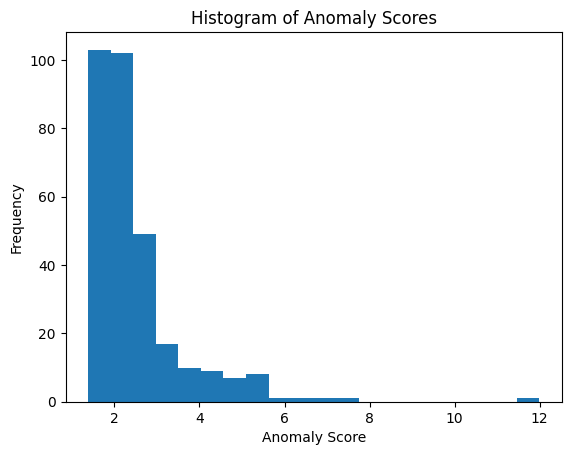

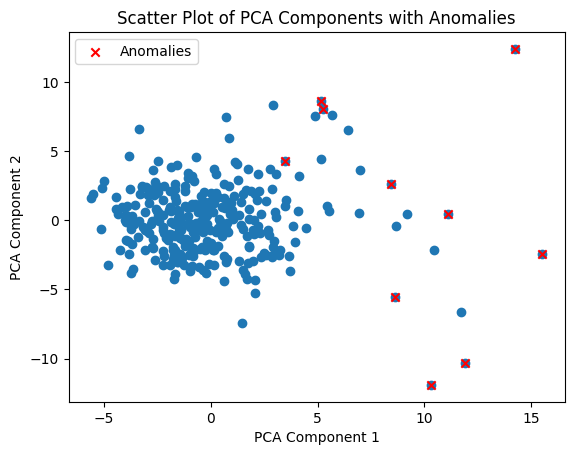

In [6]:
# Histogram of anomaly scores
plt.hist(anomaly_scores, bins=20)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.show()

# Scatter plot with anomalies highlighted
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.scatter(pca_data[top_anomalies_indices, 0], pca_data[top_anomalies_indices, 1], c='red', marker='x', label='Anomalies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components with Anomalies')
plt.legend()
plt.show()
